In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [41]:
# import libraies
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

## Load the dataset and explore the variables.

In [3]:
file = pd.read_csv('customer_churn.csv')
file.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# convert the data type of column 'TotalCharges' to float
file['TotalCharges'] = pd.to_numeric(file['TotalCharges'], errors='coerce')
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
file['TotalCharges'].isna().sum()

11

In [7]:
file['TotalCharges'] = file['TotalCharges'].fillna(np.mean(file['TotalCharges']))
file['TotalCharges'].isna().sum()

0

## Extract the target variable and independent variable.

In [8]:
# extract target variable
y = file['Churn']

# extract independent variables
X = file[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [9]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Build the logistic regression model.

In [10]:
# normalizing numerical data
transformer = Normalizer().fit(X)
X = transformer.transform(X)

X = pd.DataFrame(X)
X.head()

,0,1,2
0,0.033482,0.0,0.999439
1,0.512610,0.0,0.858622
2,0.037115,0.0,0.999311
3,0.728628,0.0,0.684910
4,0.028277,0.0,0.999600


In [11]:
# split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
model = LogisticRegression()
classification = model.fit(X_train, y_train)
predictions = classification.predict(X_test)

## Evaluate the model.

In [13]:
a_score = accuracy_score(y_test, predictions)
c_matrix = confusion_matrix(y_test, predictions)
kappa = cohen_kappa_score(y_test, predictions)

print("Accuracy_score: %4.2f" % a_score)
print("Kappa score: %4.2f" % kappa)
print("Confusion matrix:", c_matrix)

Accuracy_score: 0.77
Kappa score: 0.37
Confusion matrix: [[1359  180]
 [ 309  265]]


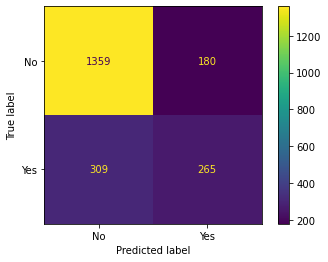

In [27]:
ConfusionMatrixDisplay.from_estimator(classification, X_test, y_test)
plt.show()

## Synthetic Minority Oversampling TEchnique (SMOTE) 

In [28]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

In [29]:
# split data into training set and test set
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [30]:
classification_sm = model.fit(X_train_sm, y_train_sm)
predictions_sm = classification_sm.predict(X_test_sm)

In [31]:
a_score_sm = accuracy_score(y_test_sm, predictions_sm)
c_matrix_sm = confusion_matrix(y_test_sm, predictions_sm)
kappa_sm = cohen_kappa_score(y_test_sm, predictions_sm)

print("Accuracy_score: %4.2f" % a_score_sm)
print("Kappa score: %4.2f" % kappa_sm)
print("Confusion matrix:", c_matrix_sm)

Accuracy_score: 0.73
Kappa score: 0.46
Confusion matrix: [[1099  475]
 [ 370 1161]]


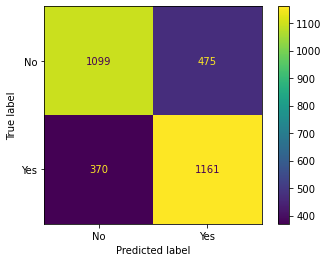

In [32]:
ConfusionMatrixDisplay.from_estimator(classification_sm, X_test_sm, y_test_sm)
plt.show()

## Tomek links 

In [36]:
tome = TomekLinks()
X_tm, y_tm = tome.fit_resample(X, y)
y_tm.value_counts()

No     4674
Yes    1869
Name: Churn, dtype: int64

In [37]:
# split data into training set and test set
X_train_tm, X_test_tm, y_train_tm, y_test_tm = train_test_split(X_tm, y_tm, test_size=0.3, random_state=42)

In [38]:
classification_tm = model.fit(X_train_tm, y_train_tm)
predictions_tm = classification_tm.predict(X_test_tm)


In [39]:
a_score_tm = accuracy_score(y_test_tm, predictions_tm)
c_matrix_tm = confusion_matrix(y_test_tm, predictions_tm)
kappa_tm = cohen_kappa_score(y_test_tm, predictions_tm)

print("Accuracy_score: %4.2f" % a_score_tm)
print("Kappa score: %4.2f" % kappa_tm)
print("Confusion matrix:", c_matrix_tm)

Accuracy_score: 0.77
Kappa score: 0.41
Confusion matrix: [[1210  195]
 [ 260  298]]


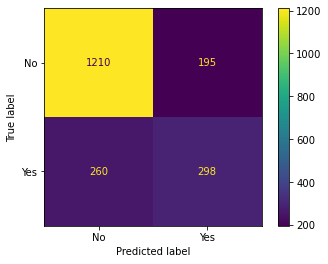

In [40]:
ConfusionMatrixDisplay.from_estimator(classification_tm, X_test_tm, y_test_tm)
plt.show()